In [1]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# read the dataset
df = pd.read_csv("C:\\Users\\babajide.alao\\Downloads\\gender_classification_v7.csv")
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [3]:
# read the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [4]:
# check for null values
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [5]:
# check for statistical info
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [6]:
# check the shape of the dataset
df.shape

(5001, 8)

In [7]:
# value count of the gender variable
df["gender"].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


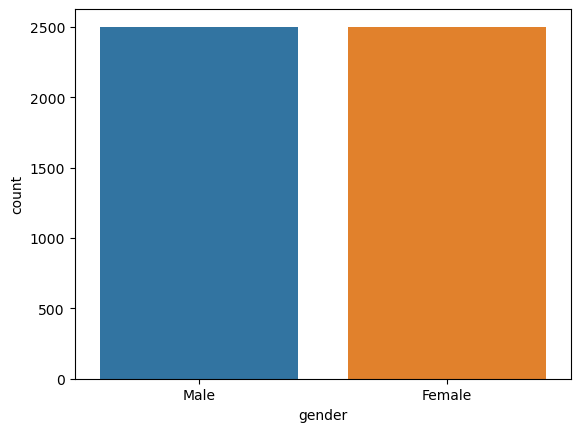

In [8]:
sns.countplot(df["gender"]);

In [9]:
# mapping/encoding of the target label
df["gender"] = df.gender.map({"Male": 1, "Female": 0})

<AxesSubplot:>

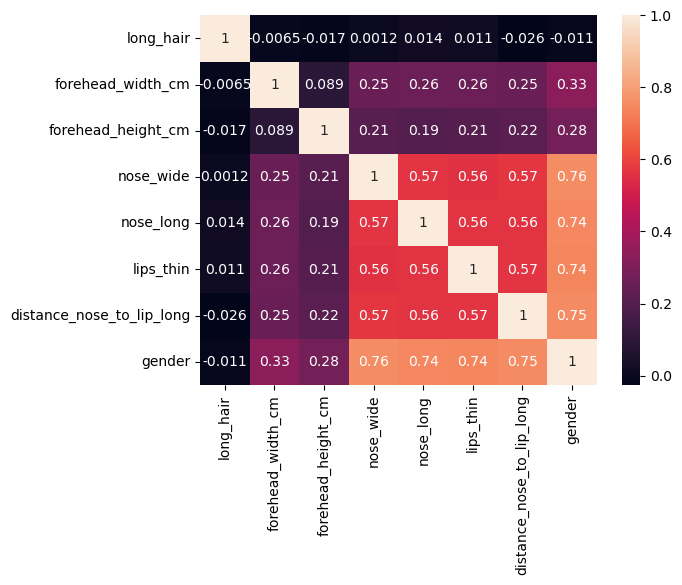

In [10]:
# check for correlation among the variables
sns.heatmap(df.corr(), annot = True)

C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='forehead_width_cm', ylabel='Density'>

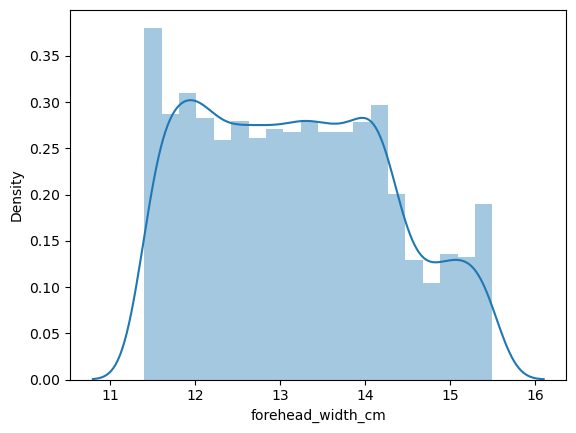

In [11]:
sns.distplot(df["forehead_width_cm"])

In [14]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [15]:
# split the columns
y = df["gender"]
x = df[['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
        'nose_long', 'lips_thin', 'distance_nose_to_lip_long']]

In [16]:
# import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
# scaling of the x data
stdscale = MinMaxScaler()
x_data = stdscale.fit_transform(x)

In [19]:
x = pd.DataFrame(x_data, columns=x.columns)

In [20]:
# spliting the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [21]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
pred = lr.predict(x_test)
print(f'the accuracy score for logistic is {accuracy_score(y_test, pred)}')

0.9705714285714285
the accuracy score for logistic is 0.9626915389740173


In [22]:
rand = RandomForestClassifier()
rand.fit(x_train, y_train)
print(rand.score(x_train, y_train))
pred = rand.predict(x_test)
print(f'the accuracy score for random forest is {accuracy_score(y_test, pred)}')

0.9991428571428571
the accuracy score for random forest is 0.9613590939373751


In [23]:
dec = DecisionTreeClassifier()
dec.fit(x_train, y_train)
print(dec.score(x_train, y_train))
pred = dec.predict(x_test)
print(f'the accuracy score for Decision tree is {accuracy_score(y_test, pred)}')

0.9991428571428571
the accuracy score for Decision tree is 0.9566955363091273


In [24]:
gbr = GradientBoostingClassifier()
gbr.fit(x_train, y_train)
print(gbr.score(x_train, y_train))
pred = gbr.predict(x_test)
print(f'the accuracy score for gradient boosting is {accuracy_score(y_test, pred)}')

0.9831428571428571
the accuracy score for gradient boosting is 0.9673550966022652


In [25]:
result = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[723  16]
 [ 33 729]]


In [26]:
Range_k = range(1, 15)
scores = {}
scores_list = []
for k in Range_k:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    scores[k] = accuracy_score(y_test, y_pred)
    scores_list.append(accuracy_score(y_test, y_pred))
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:", )
print(result1)

C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

Confusion Matrix:
[[721  18]
 [ 47 715]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       739
           1       0.98      0.94      0.96       762

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501



C:\tools\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


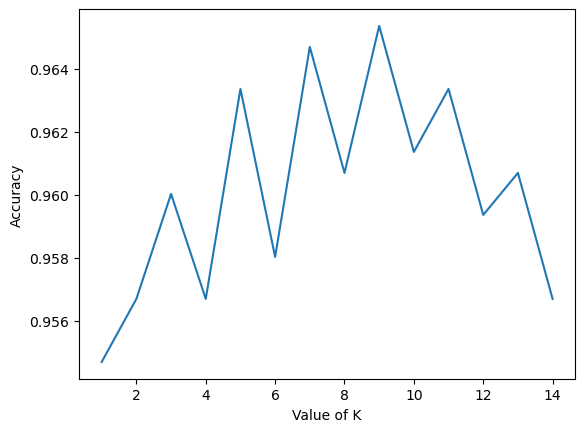

In [27]:
plt.plot(Range_k, scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.show()

In [28]:
import joblib

In [29]:
joblib.dump(gbr, 'gender_model.pkl')

['gender_model.pkl']